# DATA CLEANING

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import requests as rq
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as bs
import re
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=False

# IMPORTING DATAFRAME

In [2]:
Cars=pd.read_csv(r"C:\Users\HP\Downloads\CARS_PROJECT_WITHOUT_DP.csv")
Cars

,year,brand,model,fuel type,km driven,price,emi/month,transmission type,owners,cities
0,2019,KIA,SELTOSHTK,Petrol,"('9,918', '', '')","11,51,399","22,510",['Manual'],['1st'],Delhi
1,2019,Hyundai,Verna1.6,Petrol,"('81,902', '', '')","9,81,699","19,192",['Manual'],['1st'],Delhi
2,2020,KIA,SELTOSGTX,Petrol,"('8,241', '', '')","17,30,699","33,835",['Automatic'],['1st'],Delhi
3,2020,Maruti,SwiftLXI,Petrol,"('10,568', '', '')","5,92,499","11,583",['Manual'],['1st'],Delhi
4,2019,Maruti,SwiftLXI,Petrol,"('27,808', '', '')","5,33,399","10,428",['Manual'],['1st'],Delhi
...,...,...,...,...,...,...,...,...,...,...
435,2013,Honda,Brio1.2,Petrol,"('15,569', '', '')","3,38,099","6,610",['Manual'],['1st'],Ghaziabad
436,2013,Honda,Brio1.2,Petrol,"('42,293', '', '')","2,86,899","5,609",['Manual'],['2nd'],Ghaziabad
437,2013,Honda,Brio1.2,Petrol,"('25,593', '', '')","2,88,399","5,638",['Manual'],['2nd'],Ghaziabad
438,2017,Maruti,Alto,Petrol,"('36,404', '', '')","2,92,299","5,715",['Manual'],['1st'],Ghaziabad


* Here I Am 'Imported' All Colected Data From Website

In [3]:
Cars["model"]=Cars["model"].str.replace("New","newwagonRLXI")
Cars["model"]=Cars["model"].str.replace("3","3Series320D")
Cars["km driven"]=Cars["km driven"].str.replace("(","")
Cars["km driven"]=Cars["km driven"].str.replace(")","")
Cars["km driven"]=Cars["km driven"].str.replace(",","")
Cars["km driven"]=Cars["km driven"].str.replace("''","")
Cars["km driven"]=Cars["km driven"].str.replace("'","")
Cars["price"]=Cars["price"].str.replace(",","")
Cars["emi/month"]=Cars["emi/month"].str.replace(",","")
Cars["transmission type"]=Cars["transmission type"].str.replace("[","")
Cars["transmission type"]=Cars["transmission type"].str.replace("]","")
Cars["transmission type"]=Cars["transmission type"].str.replace("'","")
Cars["owners"]=Cars["owners"].str.replace("[","")
Cars["owners"]=Cars["owners"].str.replace("]","")
Cars["owners"]=Cars["owners"].str.replace("'","")

* In My Data Frame 'Model column' Contains Unneccessary Values, And 'Replaced With New Values'.       (like:New,3)
* 'Km driven Column' ALso Consists Of Some 'Spcial Symbols' So Here Also 'Replaced With New Values'.  (like:[,],'',)
* 'Price Column' Contains 'Special Symbols'.     (like:[,],'').
* 'transmission type Column' Contains 'Special Symbols'.  (like:[,],'')
* 'Owners Columns' Contains 'Special Symbols'.    (like:[,],,)
* Successfully 'Cleaned' My Data

# DATA ANALYSIS

In [4]:
Cars

,year,brand,model,fuel type,km driven,price,emi/month,transmission type,owners,cities
0,2019,KIA,SELTOSHTK,Petrol,9918,1151399,22510,Manual,1st,Delhi
1,2019,Hyundai,Verna1.6,Petrol,81902,981699,19192,Manual,1st,Delhi
2,2020,KIA,SELTOSGTX,Petrol,8241,1730699,33835,Automatic,1st,Delhi
3,2020,Maruti,SwiftLXI,Petrol,10568,592499,11583,Manual,1st,Delhi
4,2019,Maruti,SwiftLXI,Petrol,27808,533399,10428,Manual,1st,Delhi
...,...,...,...,...,...,...,...,...,...,...
435,2013,Honda,Brio1.2,Petrol,15569,338099,6610,Manual,1st,Ghaziabad
436,2013,Honda,Brio1.2,Petrol,42293,286899,5609,Manual,2nd,Ghaziabad
437,2013,Honda,Brio1.2,Petrol,25593,288399,5638,Manual,2nd,Ghaziabad
438,2017,Maruti,Alto,Petrol,36404,292299,5715,Manual,1st,Ghaziabad


* 'After Cleaning' My Data Is Like This..
* In My Data Frame '440 Rows And 10 Coumns' Are There.
* Only 3 Fuel Types Of Cars Are Available (Petrol,Diesel,CNG).
* Here 'Manual&Automatic Transmission Types' Are Only Available.

In [5]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               440 non-null    int64 
 1   brand              440 non-null    object
 2   model              440 non-null    object
 3   fuel type          440 non-null    object
 4   km driven          440 non-null    object
 5   price              440 non-null    object
 6   emi/month          440 non-null    object
 7   transmission type  440 non-null    object
 8   owners             440 non-null    object
 9   cities             440 non-null    object
dtypes: int64(1), object(9)
memory usage: 34.5+ KB


* In My DataFrame Nee To Change Data Types For Few Coolumns As 'km Driven,emi/month,price'.

In [6]:
Cars=Cars.astype({"km driven":int,"price":int,"emi/month":int})
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               440 non-null    int64 
 1   brand              440 non-null    object
 2   model              440 non-null    object
 3   fuel type          440 non-null    object
 4   km driven          440 non-null    int32 
 5   price              440 non-null    int32 
 6   emi/month          440 non-null    int32 
 7   transmission type  440 non-null    object
 8   owners             440 non-null    object
 9   cities             440 non-null    object
dtypes: int32(3), int64(1), object(6)
memory usage: 29.3+ KB


* Successfully 'Converted' Into Usable Data Types

In [7]:
len(Cars["brand"].unique())

20

* In My DataFrame Total '20 Companies Branded' Cars Are Available.

In [8]:
Cars["year"].value_counts()

2019    74
2020    57
2021    56
2016    53
2018    49
2017    34
2013    24
2015    20
2014    18
2011    16
2012    15
2010    11
2022     8
2009     4
2008     1
Name: year, dtype: int64

* I My Data Frame 'More Than 50 Cars' In The Years 2019,2021,2020,2016.
* From  Data Frame 'Most Cars' Are Vavailable In The Year 2019.
* 'Least Of The Car' Available In THe Year 2008.


In [9]:
CARS=pd.read_csv(r"C:\Users\HP\Downloads\CARS_PROJECT_FINAL.csv")

In [10]:
CARS

,year,brand,model,fuel type,km driven,price,emi/month,transmission type,owners,cities
0,2019,KIA,SELTOSHTK,Petrol,9918,1151399,22510,Manual,1st,Delhi
1,2019,Hyundai,Verna1.6,Petrol,81902,981699,19192,Manual,1st,Delhi
2,2020,KIA,SELTOSGTX,Petrol,8241,1730699,33835,Automatic,1st,Delhi
3,2020,Maruti,SwiftLXI,Petrol,10568,592499,11583,Manual,1st,Delhi
4,2019,Maruti,SwiftLXI,Petrol,27808,533399,10428,Manual,1st,Delhi
...,...,...,...,...,...,...,...,...,...,...
435,2013,Honda,Brio1.2,Petrol,15569,338099,6610,Manual,1st,Ghaziabad
436,2013,Honda,Brio1.2,Petrol,42293,286899,5609,Manual,2nd,Ghaziabad
437,2013,Honda,Brio1.2,Petrol,25593,288399,5638,Manual,2nd,Ghaziabad
438,2017,Maruti,Alto,Petrol,36404,292299,5715,Manual,1st,Ghaziabad


In [60]:
CARS.describe()

,year,km driven,price,emi/month
count,440.000000,440.000000,4.400000e+02,440.000000
mean,2017.227273,31738.195455,6.726277e+05,13149.977273
std,3.179258,23701.254665,4.130826e+05,8075.849059
min,2008.000000,29.000000,1.486990e+05,2907.000000
25%,2016.000000,12749.750000,3.938240e+05,7699.500000
50%,2018.000000,27031.500000,5.441490e+05,10638.500000
75%,2020.000000,46296.000000,8.050365e+05,15738.500000
max,2022.000000,99947.000000,2.141999e+06,41876.000000


In [11]:
CARS.duplicated().sum()

0

* In My DataFrame There No "More Duplicates" Are Entered.

In [12]:
CARS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               440 non-null    int64 
 1   brand              440 non-null    object
 2   model              440 non-null    object
 3   fuel type          440 non-null    object
 4   km driven          440 non-null    int64 
 5   price              440 non-null    int64 
 6   emi/month          440 non-null    int64 
 7   transmission type  414 non-null    object
 8   owners             440 non-null    object
 9   cities             440 non-null    object
dtypes: int64(4), object(6)
memory usage: 34.5+ KB


* In 'Transmission Type Column 26 Null Value's Are There

In [13]:
CARS["transmission type"]=CARS["transmission type"].fillna(CARS["transmission type"].mode()[0])

* Filled 'Null Values With MODE VALUE' OF THAT COLUMN'S.

In [14]:
CARS["owners"].value_counts()

1st    319
2nd    102
3rd     18
4th      1
Name: owners, dtype: int64

* Most Of The Cars Are 'Used By 1 Owner'.
* Least Of The Cars 'Used By 4 Owners'.

In [15]:
CARS["model"].value_counts()

SwiftVXI         41
Alto             35
Wagon            22
Grand            16
Elite            15
                 ..
V40               1
XUV500W7          1
Kuv100K8          1
CityS             1
VentoHIGHLINE     1
Name: model, Length: 142, dtype: int64

* In My Data Frame Most Of The Car 'Models Belongs To 'SwiftVXI''

In [16]:
CARS[(CARS["price"]>=200000) & (CARS["price"]<=500000)]

,year,brand,model,fuel type,km driven,price,emi/month,transmission type,owners,cities
15,2020,Hyundai,NEW,Petrol,3812,473299,9253,Manual,2nd,Delhi
20,2011,Maruti,SwiftZXI,Petrol,49957,450999,8817,Manual,2nd,Hyderabad
21,2010,Hyundai,i10ERA,Petrol,51348,246499,4819,Manual,2nd,Hyderabad
22,2010,Hyundai,i10SPORTZ,Petrol,73177,276099,5398,Manual,2nd,Hyderabad
23,2010,Hyundai,i10SPORTZ,Petrol,81385,273099,5339,Manual,2nd,Hyderabad
...,...,...,...,...,...,...,...,...,...,...
434,2018,Renault,KwidCLIMBER,Petrol,10455,388099,7587,Manual,1st,Ghaziabad
435,2013,Honda,Brio1.2,Petrol,15569,338099,6610,Manual,1st,Ghaziabad
436,2013,Honda,Brio1.2,Petrol,42293,286899,5609,Manual,2nd,Ghaziabad
437,2013,Honda,Brio1.2,Petrol,25593,288399,5638,Manual,2nd,Ghaziabad


* From My DataFrame '186 Cars Prices  B/W 2 Laks To 5 Laks'

In [17]:
CARS[(CARS["price"]>=500000) & (CARS["price"]<=1000000)]

,year,brand,model,fuel type,km driven,price,emi/month,transmission type,owners,cities
1,2019,Hyundai,Verna1.6,Petrol,81902,981699,19192,Manual,1st,Delhi
3,2020,Maruti,SwiftLXI,Petrol,10568,592499,11583,Manual,1st,Delhi
4,2019,Maruti,SwiftLXI,Petrol,27808,533399,10428,Manual,1st,Delhi
5,2020,Maruti,SwiftLXI,Petrol,19919,566799,11081,Manual,1st,Delhi
7,2021,Renault,Kwid1.0,Petrol,368,505099,9875,Manual,1st,Delhi
...,...,...,...,...,...,...,...,...,...,...
394,2018,Maruti,SwiftLXI,Petrol,16072,562199,10991,Manual,1st,Bhopal
407,2019,Hyundai,VENUESX(O),Diesel,33164,949299,18559,Manual,1st,Patna
419,2021,Tata,NEXONXM,Petrol,16895,890699,17413,Manual,1st,Patna
427,2019,Hyundai,VENUESX(O),Diesel,33164,949299,18559,Manual,1st,Ghaziabad


* Near By '180 Cars Availabel  B/W 5 laks to 10 Laks'

In [18]:
CARS[CARS["price"]>=1000000]

,year,brand,model,fuel type,km driven,price,emi/month,transmission type,owners,cities
0,2019,KIA,SELTOSHTK,Petrol,9918,1151399,22510,Manual,1st,Delhi
2,2020,KIA,SELTOSGTX,Petrol,8241,1730699,33835,Automatic,1st,Delhi
6,2021,MG,HECTOR,Petrol,3587,1798299,35157,Manual,1st,Delhi
11,2014,Mercedes,Benz,Petrol,37531,1919099,37519,Automatic,1st,Delhi
12,2022,MG,ASTORSHARP,Petrol,2091,1767999,34565,AUTOMATIC,1st,Delhi
...,...,...,...,...,...,...,...,...,...,...
393,2021,KIA,SELTOSHTK,Petrol,9674,1116699,21832,Manual,1st,Bhopal
400,2020,MG,HECTORSMART,Petrol,6770,1570899,30711,Automatic,1st,Patna
404,2019,KIA,SELTOSGTX,Petrol,15531,1494799,29224,Manual,1st,Patna
420,2020,MG,HECTORSMART,Petrol,6770,1570899,30711,Automatic,1st,Ghaziabad


* 74 Cars Available With Prices 'Greterthan 10 laks' 

In [19]:
CARS["price"].min()

148699

* From My DataFrame 'Leastest Price Of Car Is 148699'.

In [20]:
CARS[CARS["price"]<=150000]

,year,brand,model,fuel type,km driven,price,emi/month,transmission type,owners,cities
251,2010,Maruti,AltoLX,Petrol,57120,148699,2907,Manual,3rd,Kochi


* The 'Leastest Availabel Car Is Shown Above From Kochi'

In [21]:
CARS["price"].max()

2141999

* From My DataFrame 'Highest Price Of Car Is 2141999'. 

In [22]:
CARS[CARS["price"]>=2140000]

,year,brand,model,fuel type,km driven,price,emi/month,transmission type,owners,cities
84,2018,Volkswagen,TIGUANHIGHLINE,Diesel,74860,2141999,41876,Automatic,1st,Gurgaon


* The 'Highest Availabel Car Is Shown Above From Gurgaon'

In [23]:
CARS[(CARS["cities"]=="Hyderabad") & (CARS["price"]>=500000) & (CARS["price"]<=1000000)]

,year,brand,model,fuel type,km driven,price,emi/month,transmission type,owners,cities
30,2021,Nissan,MAGNITEXV,Petrol,2982,875999,17126,Manual,1st,Hyderabad
34,2019,Volkswagen,PoloTrendline,Petrol,58463,574699,11235,Manual,1st,Hyderabad
36,2019,Volkswagen,PoloTrendline,Petrol,67849,557699,10903,Manual,1st,Hyderabad


* In 'Hyderabad There Are Only 3 Cars Are Available In Price B/W 5 to 10 laks'.

In [24]:
CARS["km driven"].min()

29

* In My DataFrame A Car Is 'Driven (Minimum) Only 29 km's'.

In [25]:
CARS[CARS["km driven"]==29]

,year,brand,model,fuel type,km driven,price,emi/month,transmission type,owners,cities
191,2022,Tata,NEXONXZ+,Diesel,29,1226299,23974,Manual,1st,Ahmadabad


* The "Least Km's Driven Car Is Shown Above In Ahmadabad Year Is 2022"

In [26]:
CARS["km driven"].max()

99947

* In My DataFrame A "Car Is Driven (Maximum) 99947 km's".

In [27]:
CARS[CARS["km driven"]==99947]

,year,brand,model,fuel type,km driven,price,emi/month,transmission type,owners,cities
29,2012,Maruti,Swift,Diesel,99947,470299,9194,Manual,1st,Hyderabad


* The "Highest Km's Driven Car Is Shown Above In Hyderabad,Year Is 2022"

In [28]:
v=CARS[(CARS["km driven"]>=20000) & (CARS["km driven"]<=50000) & (CARS["price"]>=500000) & (CARS["price"]>=700000)]

* In My DataFrame 35 Cars Are "Driven 20000 to 50000 Km's" And Its "Prices B/W 5 To 7 Laks"

# DATA VIZUALISATION

* Data Visualization Is Mainly Devide "Into 2 Types Of Plots : 1.Numarical Plots, 2.Catogorical Plots".

# NUMARCAL PLOTS

# UNIVARIATE ANALYSIS

# HISTOGRAM

Text(0.5, 1.0, 'Histogram For Price')

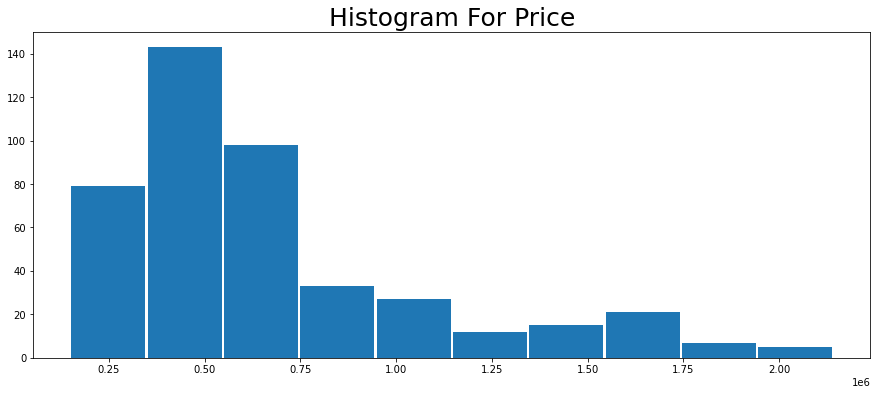

In [29]:
plt.figure(figsize=(15,6))
plt.hist(CARS["price"],bins=10,rwidth=0.97)
plt.show
plt.title("Histogram For Price",size=25)

* In My DataFrame 'Maximum Cars Prices Distibuted In B/W 0.2 To 0.75'(In Histogram)

# DISTRIBUTION PLOT

Text(0.5, 1.0, 'Distibution Of Price Without Hist')

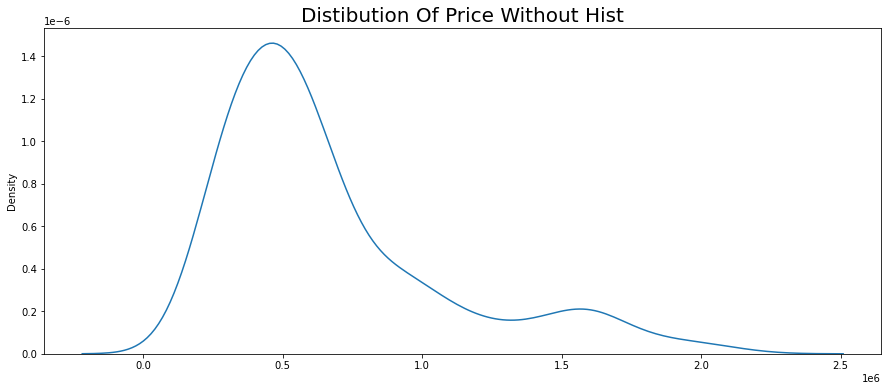

In [30]:
plt.figure(figsize=(15,6))
sns.distplot(x=CARS["price"],hist=False)
plt.title("Distibution Of Price Without Hist",size=20)

* In My DataFrame 'Maximum Cars Prices Distibuted In B/W 0.2 To 0.65'(In Distplot).

# HIST PLOT

Text(0.5, 1.0, 'Histogram Price')

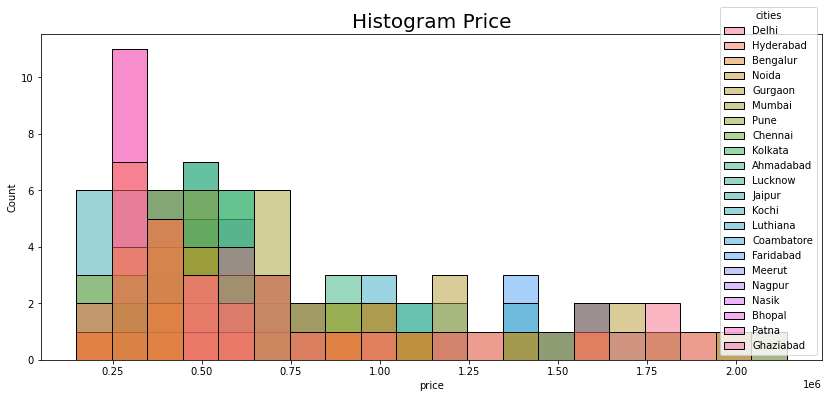

In [31]:
plt.figure(figsize=(14,6))
sns.histplot(data=CARS,x="price",bins=20,hue="cities")
plt.title("Histogram Price",size=20)

* In My DataFrame All Cars Prices Are Overlapped Each Other.

# DISTIBUTION PLOT (BINS & DIST)

Text(0.5, 1.0, 'Distibution of price')

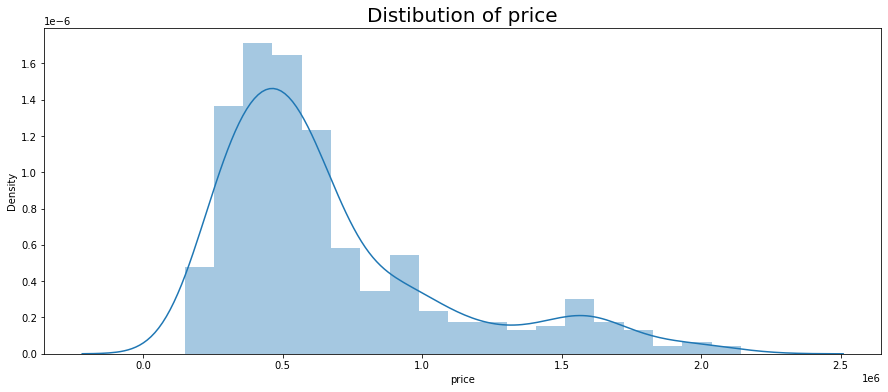

In [32]:
plt.figure(figsize=(15,6))
sns.distplot(CARS['price'])
plt.title("Distibution of price",size=20)

* In My DataFrame 'Maximum Cars Prices Distibuted In B/W 0.2 To 0.75'

# CATOGIRICAL VARIABLE

# BOX PLOT

Text(0.5, 1.0, 'Brand-Price')

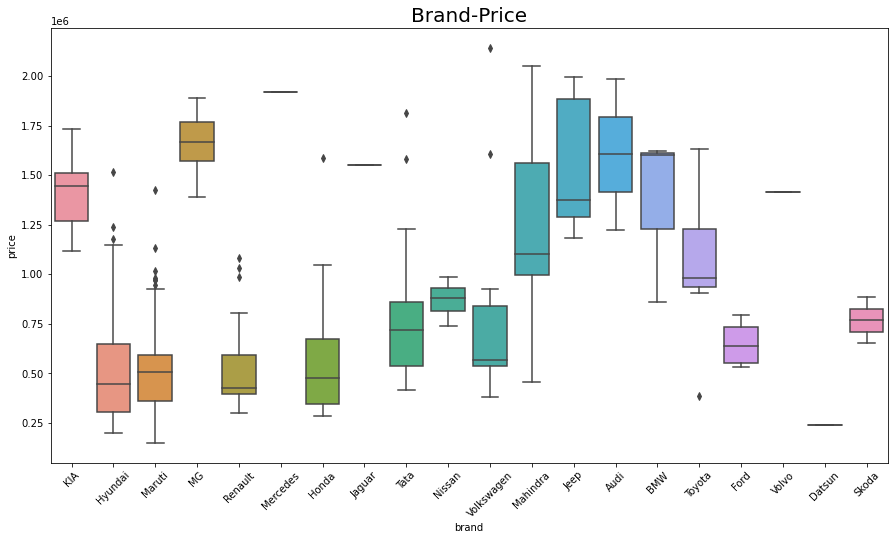

In [33]:
a=plt.figure(figsize=(15,8))
sns.boxplot(x='brand',y='price',data=CARS)
plt.xticks(rotation=45)
plt.title("Brand-Price",size=20)

* In My DtaFrame 'Jeep,Mahindra Branded' Cars Are 'High In Cost' To Buy.
* 'Hyundai,Maruti,Renault,Honda,Tata,VolksWagon' Branded Cars Contains 'Few OutLiyers' (Few Cars Price Is High).
* 'Toyota' Branded Car Contains 'One OutLier Of Least Price'

#  COUNT PLOT

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Count Of Brands')

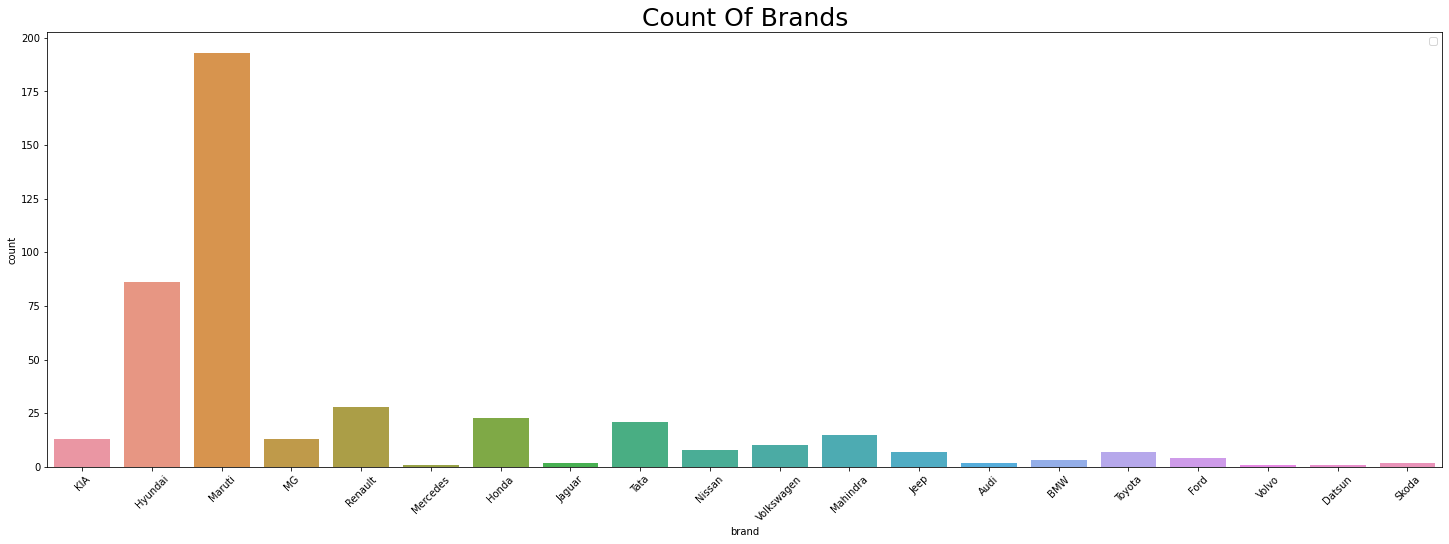

In [34]:
b=plt.figure(figsize=(25,8))
sns.countplot(CARS['brand'])
plt.xticks(rotation=45)
plt.legend()
plt.title("Count Of Brands",size=25)

* In 'This Countplot Nearby 190 Cars' Are Belongs To 'Maruthi Brand' And 'Highest Cars' From Maruthi Only 'From All Cities'.
* 2nd Highes Brand Is Hyundai Nearby 85 Cars.
* 'Least Cars' Are Belongs To Mercedes,Jaguar,Audi,Volvo,Datsun,Skoda

#  SCATTER PLOT

Text(0.5, 1.0, 'Brand-Price')

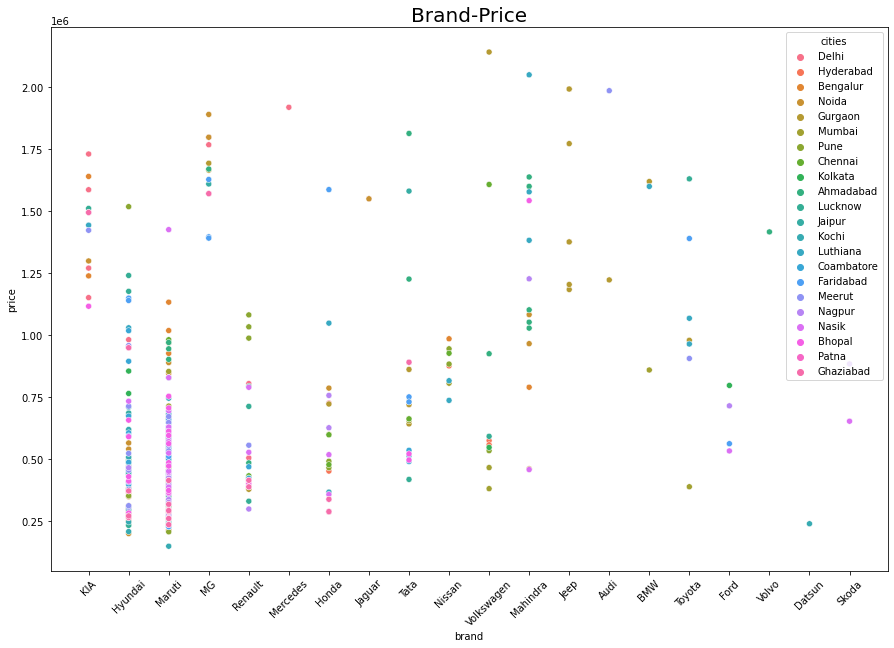

In [35]:
p=plt.figure(figsize=(15,10))
sns.scatterplot(data=CARS,x="brand",y="price",hue="cities")
plt.xticks(rotation=45)
plt.title("Brand-Price",size=20)

* In 'This Scatterplot' Highest Cars 'From Maruthi Only' From All Cities And The "Price Is Nearby 0.15 To 1.18".
* 2nd Highes Cars Brand Is Hyundai.
* 'Least Cars' Are Belongs To Mercedes,Jaguar,Audi,Volvo,Datsun,Skoda

# JOINT PLOT

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1440x576 with 0 Axes>

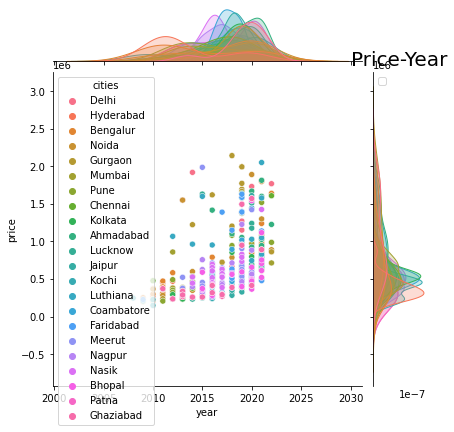

In [36]:
plt.figure(figsize=(20,8))
sns.jointplot(data=CARS,x="year",y="price",hue="cities")
plt.title("Price-Year",size=20)
plt.legend(loc=2)
plt.show()

* In My DataFrame 'All Cars Are Available B/W 2006 To 2022'
* Price B/W 0.4 To 2.2
* Most Of The Cars Are B/W 0.3 To 1.4

# VIOLINE PLOT

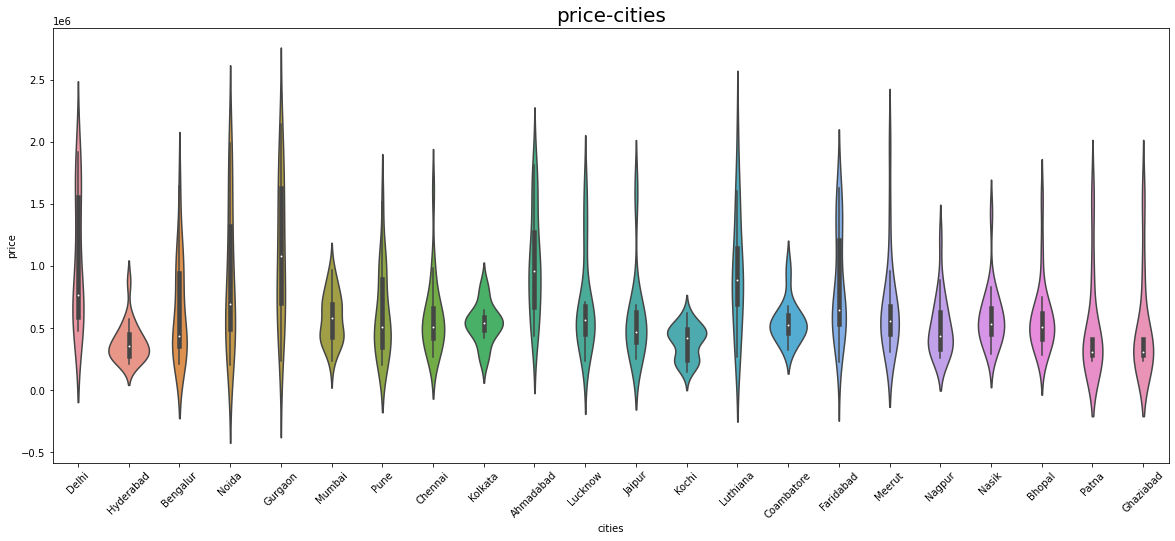

In [37]:
plt.figure(figsize=(20,8))
sns.violinplot(data=CARS,y="price",x="cities")
plt.title("price-cities",size=20)
plt.xticks(rotation=45)
plt.show()

* In My DataFrame There Are Price Drops From Bottom To High In Every City.
* But In Delhi,Gurgaon,Noida,Luthiana,Meerut Contains High Priced Cars.

# STRIP PLOT

Text(0.5, 1.0, 'Brand-Cties')

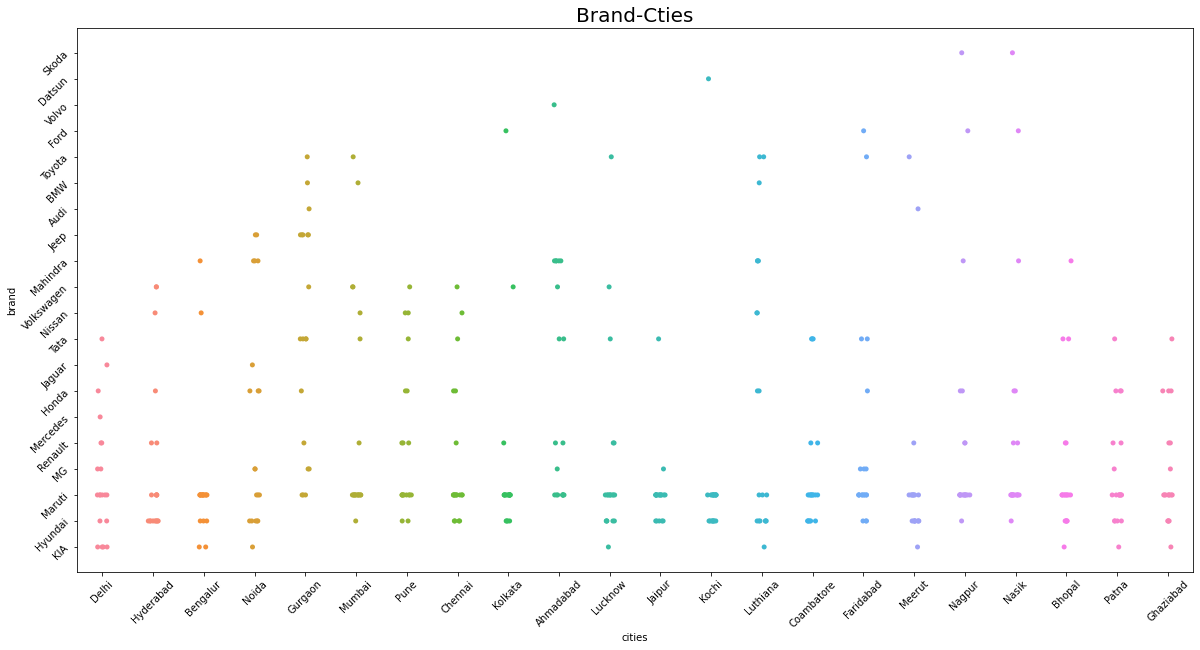

In [38]:
plt.figure(figsize=(20,10))
sns.stripplot(data=CARS,y="brand",x="cities")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Brand-Cties",size=20)

* It Shows The Distributin Of Models In Cities

# SWARM PLOT

Text(0.5, 1.0, 'Brand-Price')

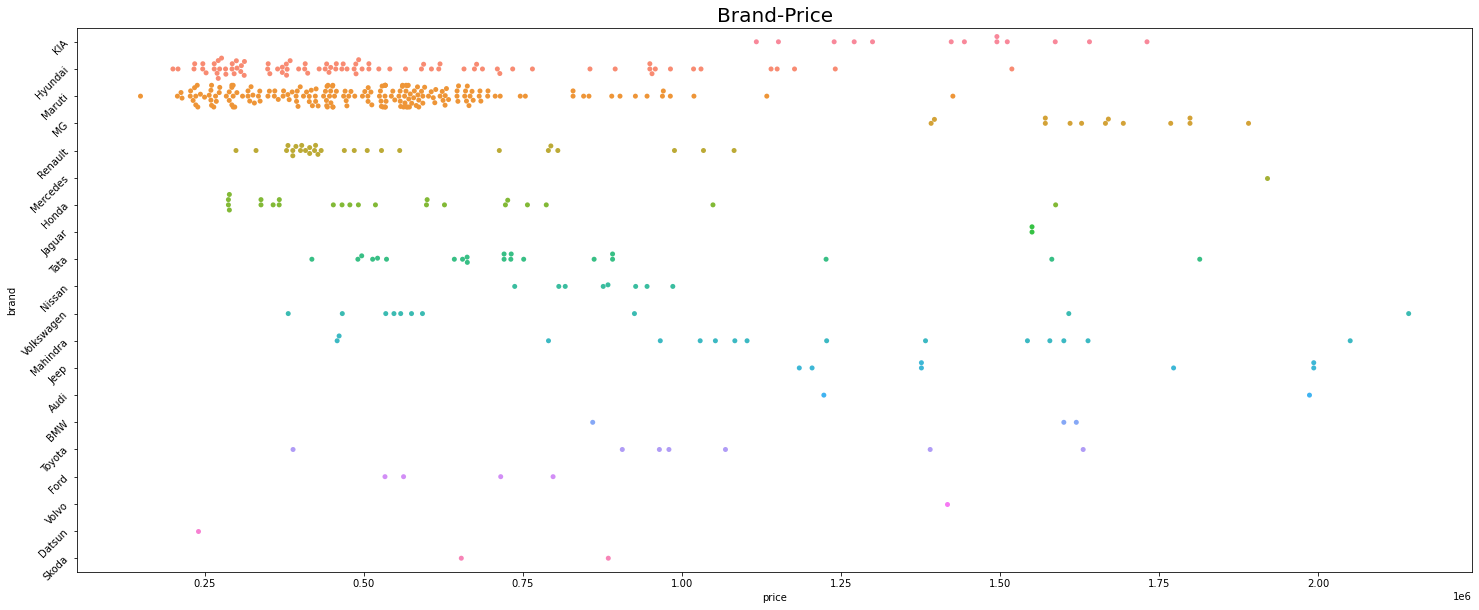

In [39]:
plt.figure(figsize=(25,10))
sns.swarmplot(data=CARS,y="brand",x="price")
plt.yticks(rotation=45)
plt.title("Brand-Price",size=20)

* It Shows The Point Not Overlaping On The Graph

# CUMILATIVE DENSITY FUNCTION

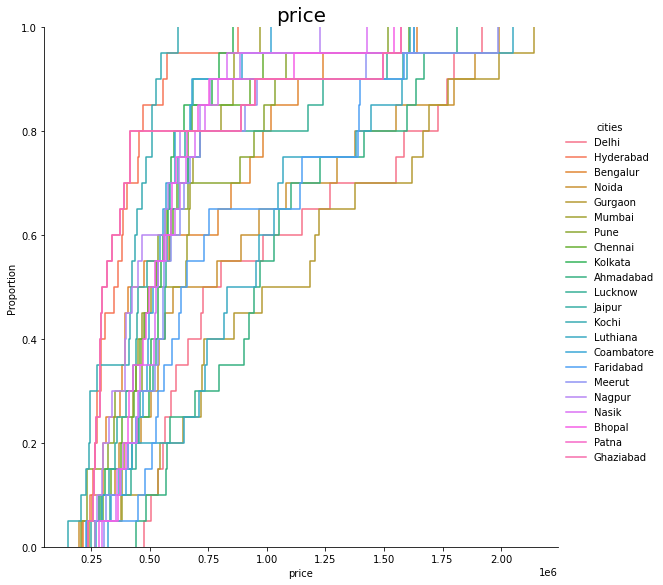

In [40]:
a=sns.FacetGrid(data=CARS,hue="cities",size=8)
a.map(sns.ecdfplot,"price")
plt.title("price",size=20)
a.add_legend()

* All The Prices Are Overlaping From All Cities

# DISTIBUTIO PLOT (WITH HUE PARAMETER)

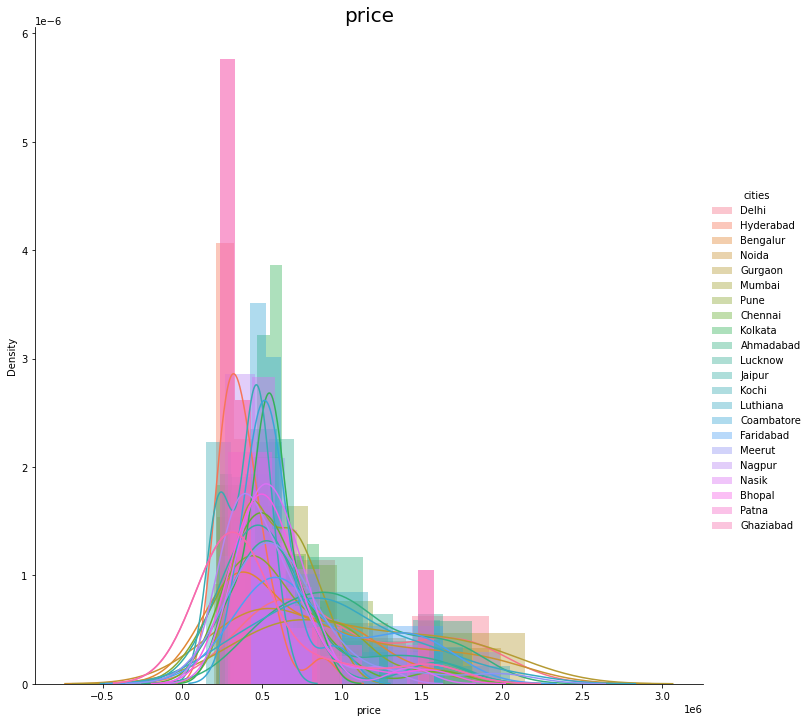

In [41]:
m=sns.FacetGrid(data=CARS,hue="cities",size=10)
m.map(sns.distplot,"price")
plt.title("price",size=20)
m.add_legend()

* In My DataFrame 'Maximum Cars Prices Distibuted In B/W 0.2 To 0.65' (In Kernal Density Estimation(KDE))

# PIE CHARTS

[]

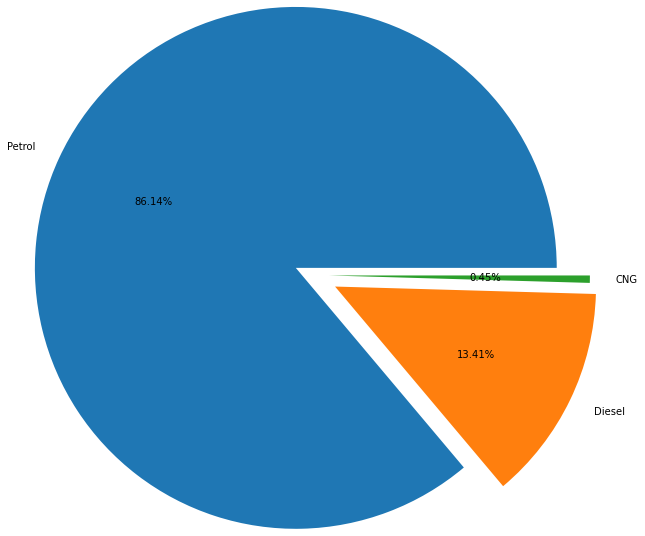

In [42]:
plt.pie(CARS["fuel type"].value_counts().values,labels=CARS["fuel type"].value_counts().index,explode=[0.2,0.3,0.2,],radius=3,autopct="%0.2f%%")
plt.plot()

* In My DataFrame "86.14%" Cars Are Belongs To "Petrol Type" 
* "13.41%" Cars Belongs To "Diesel Type"
* Only "0.4%" Of The Cars Are Belongs To "CNG Fuel Type"

[]

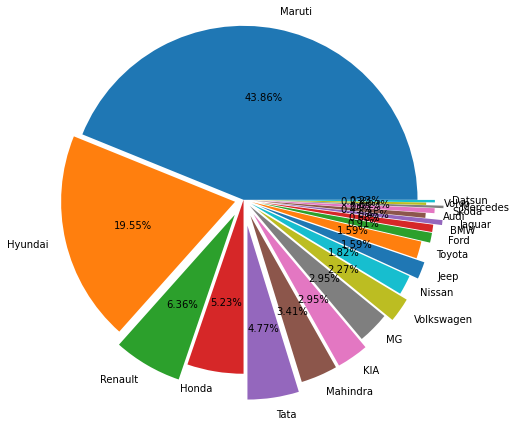

In [43]:
plt.pie(CARS["brand"].value_counts().values,labels=CARS["brand"].value_counts().index,radius=2,autopct="%0.2f%%",explode=[0,0.1,0.2,0,0.3,0.2,0.2,0.1,0.2,0.1,0.2,0.1,0.2,0.2,0.3,0.1,0.2,0.3,0.1,0.2])
plt.plot()

* In My DataFrame There Are 20 Types Of Brands Are Available.
* 43.86% Of The Cars Are Belongs To Maruthi And This Brand Is The Maximum Availble From All Brands.
* 19.55% Of The Cars Are Belongs To Hundai And This Brand Is 2nd Maximum Cars vailable Brans From All.

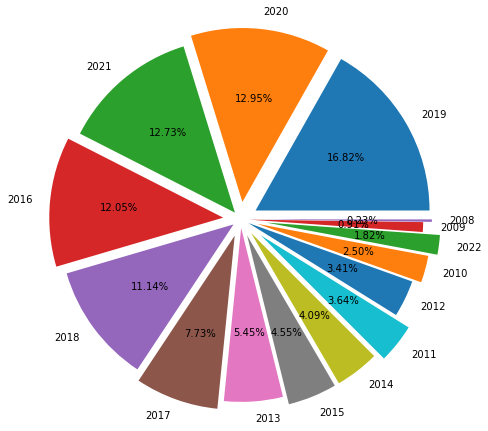

In [44]:
plt.pie(CARS["year"].value_counts().values,labels=CARS["year"].value_counts().index,radius=2,autopct="%0.2f%%",explode=[0.2,0.2,0.1,0.2,0.1,0.2,0.1,0.2,0.2,0.3,0.1,0.2,0.3,0.1,0.2])
plt.show()

* In My DataFrame "Most Of The Cars From 2019 With 16.82%".
* "Least Of The Cars From 2008 With 0.23%".

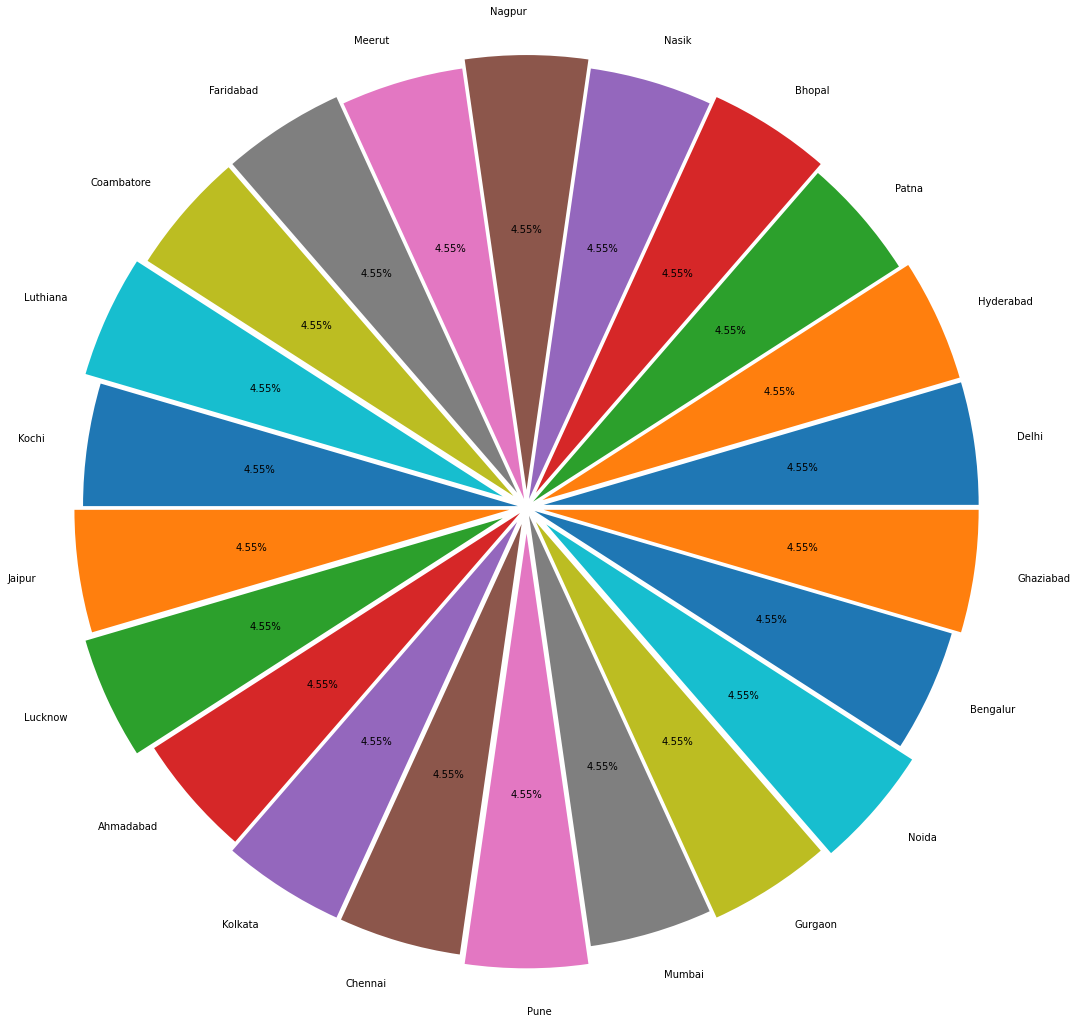

In [45]:
plt.pie(CARS["cities"].value_counts().values,labels=CARS["cities"].value_counts().index,radius=5,autopct="%0.2f%%",explode=[0.2,0.2,0.1,0.2,0.1,0.2,0.1,0.2,0.2,0.3,0.1,0.2,0.3,0.1,0.2,0.2,0.3,0.1,0.2,0.3,0.1,0.2])
plt.show()

* In My  DataFrame "All Citties Consists Of Same Counts Of Cars".

# BI-VARIATE ANALYSIS

# PIVOT TABLE

In [46]:
CARS.pivot_table(index="brand",columns="model",values=["price"],aggfunc={'price':np.mean},fill_value=' ')

price                                                   ...                                           
model      3Series320D         A A3Series320D3Series320D5TDI      A62.0  ...    i20ERA  i20MAGNA i20SPORTZ newwagonRLXI
brand                                                                    ...                                           
Audi                                               1222799.0  1986099.0  ...                                           
BMW          1229749.0                                                   ...                                           
Datsun                                                                   ...                                           
Ford                                                                     ...                                           
Honda                                                                    ...                                           
Hyundai                                                                  ...  309199.0  371049.0  365599.0             
Jaguar                                                                   ...                                           
Jeep                                                                     ...                                           
KIA                                                                      ...                                           
MG                                                                       ...                                           
Mahindra                                                                 ...                                           
Maruti                  212399.0                                         ...                                  554255.25
Mercedes                                                                 ...                                           
Nissan                                                                   ...                                           
Renault                                                                  ...                                           
Skoda                                                                    ...                                           
Tata                                                                     ...                                           
Toyota                                                                   ...                                           
Volkswagen                                                               ...                                           
Volvo                                                                    ...                                           

[20 rows x 142 columns]

* The Pivot Table Indicates Some "Branded Cars have Different Types Of Models And Prices."

# GROUP BY

In [47]:
s=CARS.groupby("cities")

In [48]:
s.ngroups

22

In [49]:
s.groups

{'Ahmadabad': [180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199], 'Bengalur': [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], 'Bhopal': [380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399], 'Chennai': [140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159], 'Coambatore': [280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299], 'Delhi': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'Faridabad': [300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319], 'Ghaziabad': [420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439], 'Gurgaon': [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'Hyderabad': [20, 21, 22, 23, 24, 25, 26, 27,

In [50]:
s.get_group("Hyderabad")["price"].mean()

384314.0

In [51]:
s.get_group("Bengalur")["price"].mean()

647944.0

In [52]:
s.get_group("Mumbai")["price"].mean()

581979.0

In [53]:
s.get_group("Delhi")["price"].mean()

1025565.35

In [54]:
s.get_group("Pune")["price"].mean()

617355.25

Text(0.5, 1.0, 'Average Of 5 Cities')

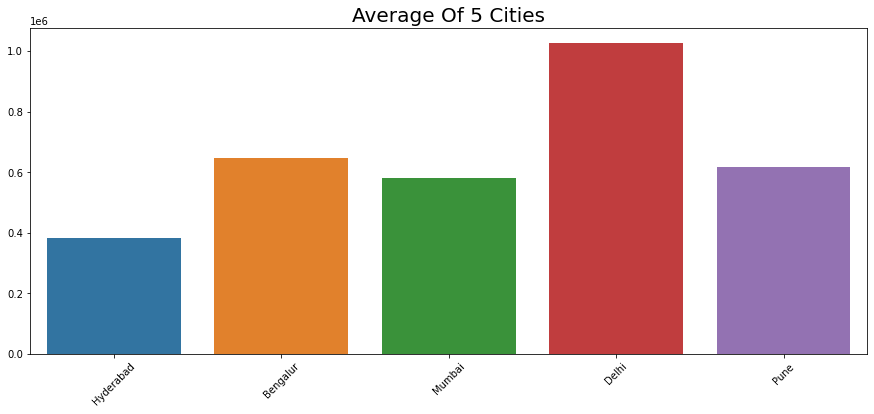

In [55]:
plt.figure(figsize=(15,6))
sns.barplot(["Hyderabad","Bengalur","Mumbai","Delhi","Pune"],[384314.0,647944.0,581979.0,1025565.35,617355.25])
plt.xticks(rotation=45)
plt.title("Average Of 5 Cities",size=20)

* The Average Is From "Hyderbad,Bengalur,Mumbai,Delhi,Pune" Delhi Is Occuring More Prices.

# SCATTER PLOT

Text(0.5, 1.0, 'Km Driven-Price')

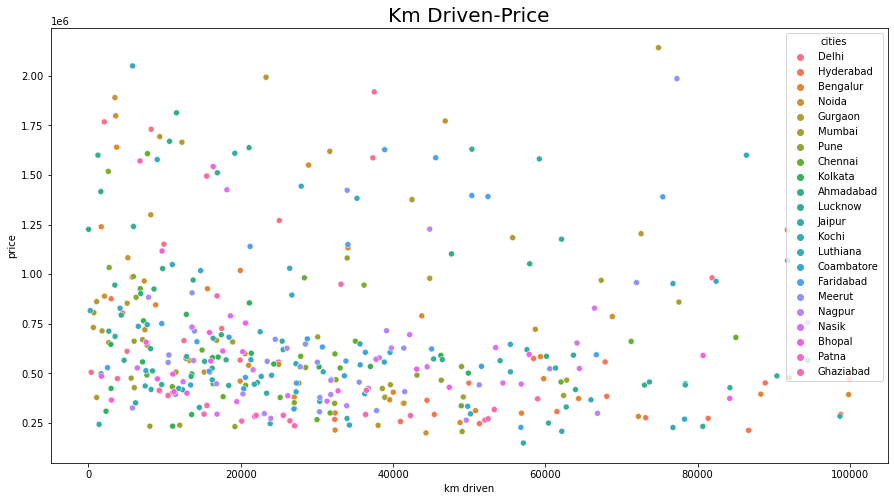

In [56]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=CARS,x="km driven",y="price",hue="cities")
plt.title("Km Driven-Price",size=20)

* In My DataFrame Most Of The Cars 'Diven IN B/W 1000 To 68000 Km's' 'This Cars Price Is In B/w 2,50,000 To 1000000'.
* These Cars Prices In B/W 0.25 To 1.10 (1**6) Range.

# PAIR PLOT

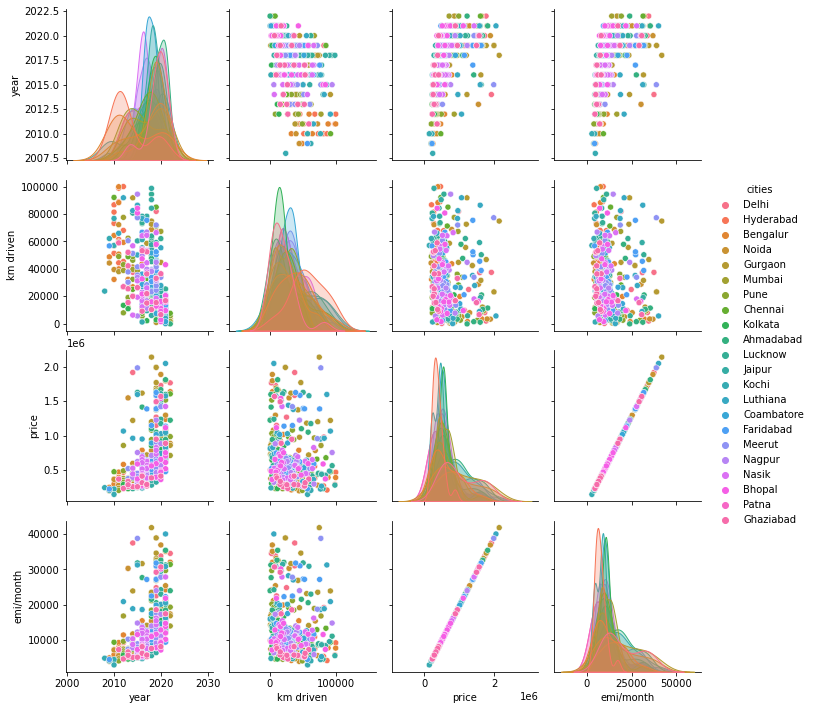

In [57]:
sns.pairplot(CARS,hue="cities")

* This Plot Is Used Only On Numarical Vs Numarica Columns (OR) Data
* In This Plot We have then used the pairplot() function to visualize the plot with the hue parameter set to the values "year,km driven,price,emi/month".
* As a result, the pair plot has been generated successfully.

# HEAT MAP(FOR CO-RELATION)

<AxesSubplot:>

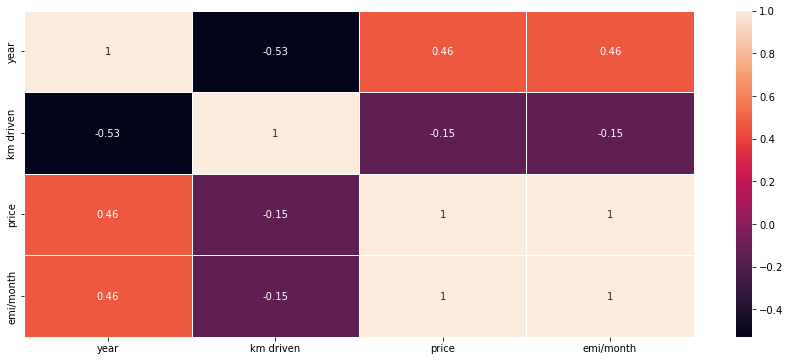

In [58]:
plt.figure(figsize=(15,6))
sns.heatmap(CARS.corr(),linewidth=0.5,annot=True)

* This Above Map Shows Co-Relation B/W Columns